In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%reload_ext postcell
%postcell register

PostCell loaded
Loading config file from /Users/victorji/Documents/GitHub/lectures/postcell.conf
Registered user Victor_Ji at https://postcell.io/post_cell


In [3]:
%matplotlib inline

# Scikit-Learn

The scikit-learn library is the premier, non-deep learning, machine learning library in the Python ecosystem. It contains algorithms for classification, regression, clustering and utilities such as test/train data set creation, various transfomers for scaling, imputation algorithms, etc.

An extremely important feature of this library is that it is designed as a cohesive whole. Allmost all algorithms fit in this framework like lego blocks. In other words, this is _not_ just a collection of algorithms which you can download as one packages.

While other classes in though program will teach the specific of algorithms, such as _linear regression_ or _decision trees_, this lecture will describe how the API works at a higher level.

### Quick classification models

#### Download a simple dataset

In [4]:
#Load a simple dataset
import seaborn as sns
titanic_df = sns.load_dataset('titanic')

#only keep numeric columns (for simplicity)
titanic_onlynum_df = titanic_df.drop(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], axis=1)

#remove na, nan, etc.
titanic_onlynum_noempty_df = titanic_onlynum_df.dropna()

In [5]:
titanic_onlynum_noempty_df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,3,35.0,0,0,8.0500,True,True


In [6]:
titanic_onlynum_noempty_df.shape

(714, 8)

#### Set up imports and test/train split

In [7]:
#pre-training
from sklearn.model_selection import train_test_split

#post training 
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_noempty_df.drop(['survived'], axis=1)
    , titanic_onlynum_noempty_df.survived
    , random_state=1)

In [9]:
X_train

,pclass,age,sibsp,parch,fare,adult_male,alone
813,3,6.0,4,2,31.2750,False,False
448,3,5.0,2,1,19.2583,False,False
145,2,19.0,1,1,36.7500,True,False
880,2,25.0,0,1,26.0000,False,False
310,1,24.0,0,0,83.1583,False,True
...,...,...,...,...,...,...,...
179,3,36.0,0,0,0.0000,True,True
808,2,39.0,0,0,13.0000,True,True
93,3,26.0,1,2,20.5750,True,False
291,1,19.0,1,0,91.0792,False,False


In [10]:
y_train

813    0
448    1
145    0
880    1
310    1
      ..
179    0
808    0
93     0
291    1
51     0
Name: survived, Length: 535, dtype: int64

#### Decision Tree

In [11]:
%%time
from sklearn import tree

model = tree.DecisionTreeClassifier(splitter='best', criterion='gini')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)

CPU times: user 92.1 ms, sys: 14.3 ms, total: 106 ms
Wall time: 107 ms


0.8212290502793296

#### Random Forest

In [12]:
%%time
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=2)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)

CPU times: user 94.1 ms, sys: 8.96 ms, total: 103 ms
Wall time: 106 ms


0.8268156424581006

#### SVM

In [13]:
%%time
from sklearn import svm

model = svm.SVC(C=1.0, kernel='rbf')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
model.score(X_test, y_test)

CPU times: user 10.2 ms, sys: 849 μs, total: 11.1 ms
Wall time: 10.3 ms


0.6983240223463687

Notice that changing models requires only **two lines to change!** 

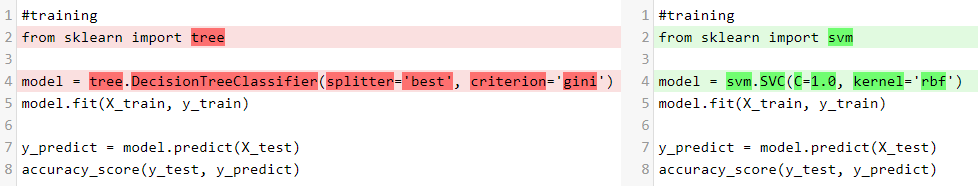

This is an example of a framework which extracted a common api, rather than a packages which throws together a bunch of algorithms, written by people who are not communicating with each other.

### Try different transformations
On my machine, the `SVC` (the svm classifier) produces the worst result. Let's try to improve it by cleaning up the data a bit.


In [14]:
%%time
X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_df.drop(['survived'], axis=1)
    , titanic_onlynum_df.survived
    , random_state=1)

CPU times: user 1.36 ms, sys: 725 μs, total: 2.08 ms
Wall time: 1.45 ms


#### Notice how similar the transformations are

In [15]:
%%time
from sklearn import preprocessing, impute

X_train_transformed = X_train

#Fill missing values
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train_transformed = imputer.fit_transform(X_train_transformed)

#Scale values
scaler = preprocessing.StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)

#You don't even have to know how a transformer works, in order to use it!
pt = preprocessing.PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_transformed)

model = svm.SVC(C=1.0, kernel='rbf')
model.fit(X_train_transformed, y_train)

model.score(pt.transform(scaler.transform(imputer.transform(X_test))), y_test)

CPU times: user 16.6 ms, sys: 861 μs, total: 17.4 ms
Wall time: 17 ms


0.7668161434977578

## Transformers, Estimators and Predictors

Scikit-learn has three main interfaces: **Transformers**, **estimators** and **predictors**.

Objects are created using a constructors, such as `StandardScaler(..)`, `SimpleImputer(..)` or `SVC(..)`.  Once created, objects will have some standard methods.

**Estimators**
```
model = SVC(...) # DecisionTreeClassifier() or RandomForestRegression(), etc.
```
Standard methods:

The `fit` method does the actual training
```
model.fit(train_inputs, train_target)
```

The `score` method returns the accuracy of trained model
```
model.score(test_inputs, test_target)
```

**Predictors**

Predictors are objects which, given an input, generate output based on the learned model. Hence, the most important method is `fit`. Given a list of inputs, perhaps the X_test matrix, this method will return corresponding (predicted) classes. The degree to which these classes match y_test is the accuracy score.
```
model.predict(target)
```

If you are not interested in the predicted classes, the probabilities attached to each class, you should use the predict_proba function (note that this function is not always implemented). Given a list of inputs, perhaps the X_test matrix, thsi method will return the probabilities associated with each guess. For example, if the expected result is male or female, each line in the input will correspond to two entries, one for the probability that the correct value is male and one for the probability that the correct value is female.

```
model.predict_proba(target)
```


**Transformers**

As we have already seen, even transformations, such as imputations, scalers, vectorizers, etc. have a standard interface.

```
transformer = StandardScaler() # or OneHotEncoder() or SimpleImputer() or PCA()
```

Although transformers have the `fit` method, the `fit_transform` method combines the fitting and transforming steps and is used much more often.
```
transformer.fit(train_data)
transformer.transform(data)
```

`fit_transform` processes the input data, such as finding the min and max values of a dataset, which requires reading the whole input, and transforming the data in the same step:
```
transformer.fit_transform(data)
```


### Model performance metrics

Once a model has been trained, scikit-learn provides many ways of assessing the quality of the model. Let's bring back an earlier model. Notice the estimators come with a `score` method:

In [16]:
%%time
X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_noempty_df.drop(['survived'], axis=1)
    , titanic_onlynum_noempty_df.survived
    , random_state=1)

#training

model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=2)
model.fit(X_train, y_train)

model.score(X_test, y_test)

CPU times: user 55.9 ms, sys: 2.21 ms, total: 58.1 ms
Wall time: 57.6 ms


0.8212290502793296

Since this was a classification problem, you can generate a confusion matrix:

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

y_predict = model.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[97, 15],
       [17, 50]])

##### Bonus: Visualizing confusion matrices

<Axes: >

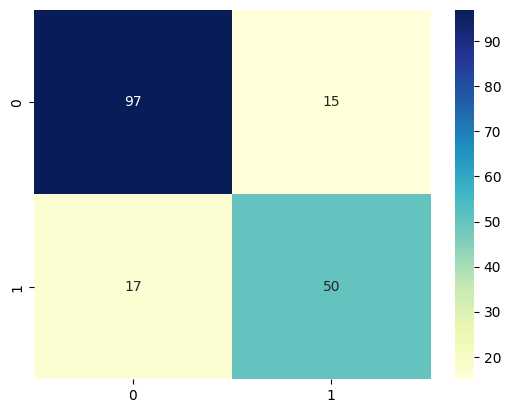

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d", cmap="YlGnBu")

A recent scikit-learn visualization library Yellowbrick looks very useful:
https://www.scikit-yb.org/en/latest/gallery.html

They have created a fourth important interface: **Visualizers** (similar to Estimators, Transformers and Predictors)

A full classification report can be generated via:

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       112
           1       0.77      0.75      0.76        67

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Similarly, regression matrix, such as `means_absolute_error`, `mean_squared_error`, `r2_score`, etc. are also available from `sklearn.metrics`

### Model Tuning

Of all the models we tried, SVM performed the worst (at least on my laptop). However, we have not done any tuning of the model. Scikit-learn provides two main methods of hyper parameter optimization: `GridSearchCV` and `RandomizedSearchCV`

In [20]:
%%time
from sklearn.model_selection import GridSearchCV

params = {'C':[.01, .1, 1, 10], 'kernel':['rbf', 'linear', 'poly']}

grid = GridSearchCV(estimator=svm.SVC(), param_grid=params)

grid.fit(X_train, y_train)

CPU times: user 14.7 s, sys: 68 ms, total: 14.7 s
Wall time: 14.7 s


,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [21]:
print(grid.best_score_)
print(grid.best_estimator_)

0.811214953271028
SVC(C=0.1, kernel='linear')


### Pipeline

Notice in an earlier cell how several transformers worked _very_ similarly:

```python
#Fill missing values
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train_transformed = imputer.fit_transform(X_train_transformed)

#Scale values
scaler = preprocessing.StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)

#You don't even have to know how a transformer works, in order to use it!
pt = preprocessing.PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_transformed)
```

The code is so similar that we shouldn't have to repeat ourselves. `Pipeline` class in sklearn will take care of the common parts:

In [22]:
%%time
from sklearn import pipeline

X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_df.drop(['survived'], axis=1)
    #titanic_onlynum_noempty_df.drop(['survived'], axis=1)
    , titanic_onlynum_df.survived
    #, titanic_onlynum_noempty_df.survived
    , random_state=1)

pipe = pipeline.make_pipeline(
    # Transformers
    impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    ,preprocessing.StandardScaler()
    ,preprocessing.PowerTransformer()
    ,svm.SVC(C=1.0, kernel='rbf') # <== Classifier
)


pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

CPU times: user 18.3 ms, sys: 1.15 ms, total: 19.4 ms
Wall time: 19.6 ms


0.7668161434977578

### Gridsearch over whole pipeline (include transformers)

In [23]:
%%time
from sklearn import pipeline

X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_noempty_df.drop(['survived'], axis=1)
    , titanic_onlynum_noempty_df.survived
    , random_state=1)

pipe = pipeline.make_pipeline(
    # Transformers
    impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    ,preprocessing.StandardScaler()
    ,preprocessing.PowerTransformer()
    ,svm.SVC() # <== Classifier
)


params = {'svc__C':[.01, .1, 1, 10], 'svc__kernel':['rbf', 'linear', 'poly'], 'standardscaler__with_mean':[True, False]}
optimized_pipe = GridSearchCV(pipe, param_grid=params, n_jobs=-1)

optimized_pipe.fit(X_train, y_train)
optimized_pipe.score(X_test, y_test)

CPU times: user 109 ms, sys: 84.1 ms, total: 193 ms
Wall time: 1.87 s


0.8491620111731844

In [24]:
optimized_pipe.best_estimator_

,steps,"[('simpleimputer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'constant'
,fill_value,0
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


### Column Transformer
There are times when you need to apply a transformation to just a few columns of a dataframe. `ColumnTransformer` helps you do exactly that

In [25]:
X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone
813,3,6.0,4,2,31.2750,False,False
448,3,5.0,2,1,19.2583,False,False
145,2,19.0,1,1,36.7500,True,False
880,2,25.0,0,1,26.0000,False,False
310,1,24.0,0,0,83.1583,False,True


In [26]:
from sklearn.compose import ColumnTransformer, make_column_transformer

col_transformer = make_column_transformer(
    (preprocessing.StandardScaler(), ['age', 'sibsp','fare']),
    remainder='passthrough'
)

pd.DataFrame(col_transformer.fit_transform(X_train), columns=['age', 'sibsp','fare']+['pclass', 'parch', 'adult_male', 'alone'])

,age,sibsp,fare,pclass,parch,adult_male,alone
0,-1.645425,3.899228,-0.079628,3,2,False,False
1,-1.714427,1.672881,-0.298724,3,1,False,False
2,-0.748401,0.559708,0.020196,2,1,True,False
3,-0.33439,-0.553466,-0.175805,2,1,False,False
4,-0.403392,-0.553466,0.86634,1,0,False,True
...,...,...,...,...,...,...,...
530,0.424629,-0.553466,-0.649853,3,0,True,True
531,0.631635,-0.553466,-0.412829,2,0,True,True
532,-0.265389,0.559708,-0.274717,3,2,True,False
533,-0.748401,0.559708,1.010758,1,0,False,False


In [27]:
col_transformer.fit_transform(X_train)

array([[-1.645424813756127, 3.8992280641705652, -0.07962790839037734,
        ..., 2, False, False],
       [-1.7144266201486364, 1.6728811972215234, -0.2987236480646622,
        ..., 1, False, False],
       [-0.7484013306535022, 0.5597077637470023, 0.020195601784355314,
        ..., 1, True, False],
       ...,
       [-0.26538868590593506, 0.5597077637470023, -0.27471677759031143,
        ..., 2, True, False],
       [-0.7484013306535022, 0.5597077637470023, 1.0107584235167908, ...,
        0, False, False],
       [-0.6103977178684831, -0.553465669727519, -0.5076383013313541,
        ..., 0, True, True]], shape=(535, 7), dtype=object)

In [28]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import preprocessing  # Import preprocessing

col_transformer = make_column_transformer(
    (preprocessing.StandardScaler(), ['age', 'sibsp','fare']),
    (preprocessing.OneHotEncoder(), ['adult_male', 'alone']),
    remainder='passthrough'
)

pd.DataFrame(col_transformer.fit_transform(X_train), columns=['age', 'sibsp','fare','adult_male1','adult_male2', 'alone1', 'alone2']+['pclass', 'parch'])


,age,sibsp,fare,adult_male1,adult_male2,alone1,alone2,pclass,parch
0,-1.645425,3.899228,-0.079628,1.0,0.0,1.0,0.0,3.0,2.0
1,-1.714427,1.672881,-0.298724,1.0,0.0,1.0,0.0,3.0,1.0
2,-0.748401,0.559708,0.020196,0.0,1.0,1.0,0.0,2.0,1.0
3,-0.334390,-0.553466,-0.175805,1.0,0.0,1.0,0.0,2.0,1.0
4,-0.403392,-0.553466,0.866340,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
530,0.424629,-0.553466,-0.649853,0.0,1.0,0.0,1.0,3.0,0.0
531,0.631635,-0.553466,-0.412829,0.0,1.0,0.0,1.0,2.0,0.0
532,-0.265389,0.559708,-0.274717,0.0,1.0,1.0,0.0,3.0,2.0
533,-0.748401,0.559708,1.010758,1.0,0.0,1.0,0.0,1.0,0.0


### Pipeline with transformers (whole thing optimized with grid search)

In [29]:
%%time
from sklearn import pipeline

X_train, X_test, y_train, y_test = train_test_split(
    titanic_onlynum_noempty_df.drop(['survived'], axis=1)
    , titanic_onlynum_noempty_df.survived
    , random_state=1)

col_transformer = make_column_transformer(
    (preprocessing.StandardScaler(), ['age', 'sibsp','fare']),
    (preprocessing.OneHotEncoder(), ['adult_male', 'alone']),
    remainder='passthrough'
)

pipe = pipeline.make_pipeline(
    col_transformer
    ,svm.SVC() # <== Classifier
)


params = {'svc__C':[.01, .1, 1, 10], 'svc__kernel':['rbf', 'linear', 'poly'], 'columntransformer__standardscaler__with_mean':[True, False]}
optimized_pipe = GridSearchCV(pipe, param_grid=params, n_jobs=-1)

optimized_pipe.fit(X_train, y_train)
optimized_pipe.score(X_test, y_test)

CPU times: user 74.2 ms, sys: 7.4 ms, total: 81.6 ms
Wall time: 131 ms


0.8268156424581006

In [30]:
optimized_pipe.best_estimator_

,steps,"[('columntransformer', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Save/load models
Once a model is trained, it can be saved to disk. The saved file contains the weights, as well as details about Python classes which can load them and allow clients to `predict` values.

In [31]:
from joblib import dump

dump(optimized_pipe, 'model.joblib')

['model.joblib']

In [32]:
%ls

100-scikit-learn-method_behind_the_madness.ipynb
110-scikit-learn-run_saved_model.ipynb
model.joblib
model_server.py
postcell.log


#### Load model from disk

In [33]:
from joblib import load

In [34]:
trained_model = load('model.joblib')

In [35]:
trained_model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0])

In [36]:
list(y_test.head())

[1, 0, 1, 1, 0]

See [notebook](110-scikit-learn-run_saved_model.ipynb) for a "clean room" demonstration of code which loads a scikit-learn model.

# End notes

#### PyCaret
http://pycaret.org
A higher level machine learning library

#### SKORCH
https://github.com/skorch-dev/skorch
Scikit-learn compatible deep learning library

#### awesome-scikit-learn
https://github.com/fkromer/awesome-scikit-learn
General links to the scikit-learn ecosystem